# Analysis:
* The sentiment analysis can have different results depending on the number of tweets one examines. A trend that I've noticed while testing the code numerous times is that Fox News tends to have a more negative polarity in their tweets when compared to other news outlets.
* As I stated above, the sentiment analysis can be flawed because at one moment Fox could be more negative than the media outlets, but if one were to run the code again in 30 minutes, or an hour, the results could be altered drastically.
* One method to improve the sentiment analysis would be to use more randomly sampled tweets over a greater span of time. Doing so would remove the bias that could be coming into play when there is a tragedy or a politically charged event occuring, or having just occurred.

In [1]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Tweepy Calls & Sentiment Analysis

In [2]:
target_user = ("@FoxNews", "@CNN", "@nytimes", "@BBCNews", "@CBSNews")

sentiments = []

for user in target_user:
    counter = 1
    for x in range(5):
        public_tweets = api.user_timeline(user, count = 20)
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            sentiments.append({"Username": user,
                               "Text": tweet["text"],
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets_Ago": counter})

            counter += 1

# Make Data Frame & Convert into CSV

In [3]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
date = datetime.strptime(sentiments_pd["Date"][0],'%a %b %d %H:%M:%S +0000 %Y').strftime('%m/%d/%Y')
sentiments_pd.to_csv("Output/media_tweet_sentiments.csv", sep=',', encoding='utf-8', index = False)
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Text,Tweets_Ago,Username
0,-0.7717,Fri Jul 13 03:15:00 +0000 2018,0.628,0.372,0.000,Samantha Bee speaks out about crude Ivanka Tru...,1,@FoxNews
1,-0.6249,Fri Jul 13 03:05:00 +0000 2018,0.579,0.421,0.000,Border Patrol arrests suspect in deadly Texas ...,2,@FoxNews
2,0.0000,Fri Jul 13 02:59:00 +0000 2018,1.000,0.000,0.000,Dems who drafted bill to abolish ICE now say t...,3,@FoxNews
3,-0.1531,Fri Jul 13 02:51:42 +0000 2018,0.890,0.110,0.000,"Rudy Giuliani: ""The Mueller investigation is f...",4,@FoxNews
4,0.0000,Fri Jul 13 02:49:34 +0000 2018,1.000,0.000,0.000,"Rudy Giuliani: ""To this day they can't find a ...",5,@FoxNews
5,0.0000,Fri Jul 13 02:47:02 +0000 2018,1.000,0.000,0.000,Rudy Giuliani on status of a potential @POTUS ...,6,@FoxNews
6,0.0000,Fri Jul 13 02:41:09 +0000 2018,1.000,0.000,0.000,"Rudy Giuliani on the Mueller probe: ""[Peter St...",7,@FoxNews
7,0.0000,Fri Jul 13 02:33:00 +0000 2018,1.000,0.000,0.000,Jury convicts key players in corruption case l...,8,@FoxNews
8,-0.5574,Fri Jul 13 02:25:43 +0000 2018,0.816,0.184,0.000,".@TGowdySC on alleged FISA abuses: ""A politici...",9,@FoxNews
9,-0.1027,Fri Jul 13 02:20:26 +0000 2018,0.935,0.065,0.000,".@TGowdySC on Strzok hearing: ""He's the only p...",10,@FoxNews


In [4]:
sentiments_pd.count()

Compound      500
Date          500
Negative      500
Neutral       500
Positive      500
Text          500
Tweets_Ago    500
Username      500
dtype: int64

In [5]:
avg_sentiments_df = sentiments_pd[["Username","Compound"]].groupby(["Username"])["Compound"].mean()
avg_sentiments_df = pd.DataFrame(avg_sentiments_df).reset_index()
avg_sentiments_df = avg_sentiments_df.rename(columns={ "Compound" : "Average Polarity"})
avg_sentiments_df

,Username,Average Polarity
0,@BBCNews,-0.051170
1,@CBSNews,-0.219540
2,@CNN,0.013900
3,@FoxNews,-0.137245
4,@nytimes,-0.114170


# Scatter Plot
Shows the tweet sentiments of the tweets from each news outlet

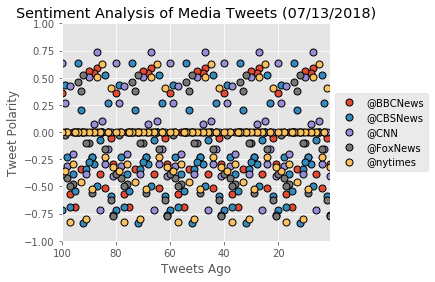

In [6]:
groups = sentiments_pd.groupby('Username')
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    x = group.Tweets_Ago
    y = group.Compound
    ax.plot(x,y, marker='o',markeredgecolor="black", linestyle='', ms=7, label=name)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-10,110)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title(f"Sentiment Analysis of Media Tweets ({date})")
plt.ylim(-1,1)
plt.xlim([x.max(),x.min()])
plt.savefig("Output/Sentiment_Analysis.png")
plt.show()

# Bar Chart
Highlights the overall tweet sentiments for various news outlets# 

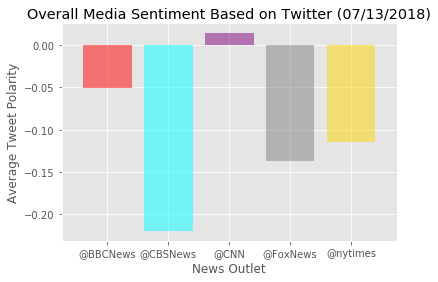

In [7]:
y_vals = avg_sentiments_df["Average Polarity"]
x_axis = np.arange(len(y_vals))
labels = avg_sentiments_df["Username"]
colors = ["red", "cyan", "purple", "grey", "gold"]
plt.bar(x_axis, y_vals, alpha=0.5, align="center", color = colors)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title(f"Overall Media Sentiment Based on Twitter ({date})")
plt.xlabel("News Outlet")
plt.ylabel("Average Tweet Polarity")
plt.savefig("Output/Overall_Analysis.png")
plt.show()